In [1]:
import sys
import torch
from data import PascalSegmentationDataset, ADE20KDataset
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/home/jacob/scribblegen/ControlNet')
from ControlNet.cldm.model import create_model, load_state_dict

In [6]:
device = torch.device('cuda:2')
dataset = PascalSegmentationDataset(train=False)
#dataloader = torch.utils.data.DataLoader(dataset, batchsize=1)

In [3]:
model_config_path = './ControlNet/models/cldm_v15.yaml'
model_checkpoint_path = 'logs/PascalSegmentation/lightning_logs/version_15/checkpoints/epoch=126-step=84073.ckpt'
#model_checkpoint_path = 'logs/PascalSegmentation/lightning_logs/version_13/checkpoints/epoch=49-step=33099.ckpt'

model = create_model(model_config_path).to(device)
model.load_state_dict(load_state_dict(model_checkpoint_path, location=device))
model.cond_stage_model.device = device

No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.mlp.fc2.bias', 'vision_model.encoder.layers.7.self_attn.v_proj.weight', 'vision_model.encoder.layers.16.self_attn.v_proj.weight', 'vision_model.encoder.layers.14.self_attn.q_proj.bias', 'vision_model.encoder.layers.19.self_attn.q_proj.bias', 'vision_model.encoder.layers.8.layer_norm1.bias', 'vision_model.embeddings.position_ids', 'vision_model.encoder.layers.7.layer_norm2.weight', 'vision_model.encoder.layers.11.layer_norm1.weight', 'vision_model.encoder.layers.16.mlp.fc1.bias', 'vision_model.encoder.layers.3.mlp.fc2.weight', 'vision_model.encoder.layers.0.layer_norm2.weight', 'vision_model.encoder.layers.6.mlp.fc2.weight', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.mlp.fc2.bias', 'vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.14.mlp.fc2.weight', 'vision_model.encod

Loaded model config from [./ControlNet/models/cldm_v15.yaml]
Loaded state_dict from [logs/PascalSegmentation/lightning_logs/version_15/checkpoints/epoch=126-step=84073.ckpt]


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


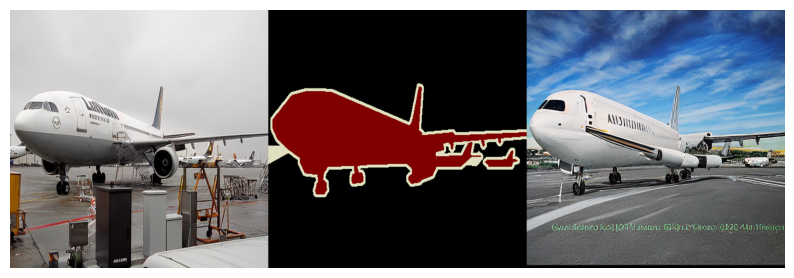

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


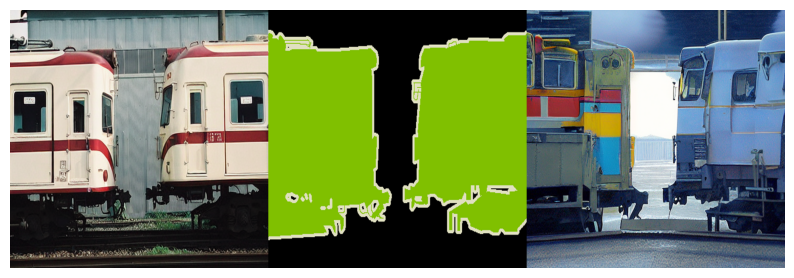

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


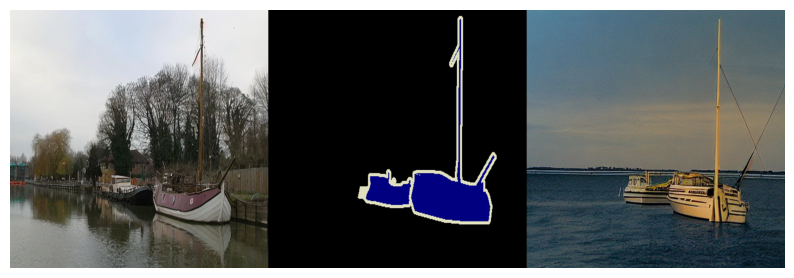

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


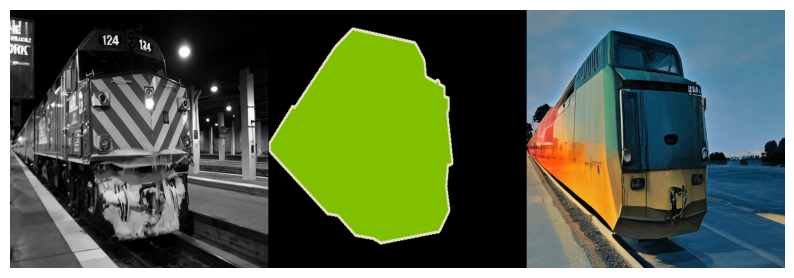

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


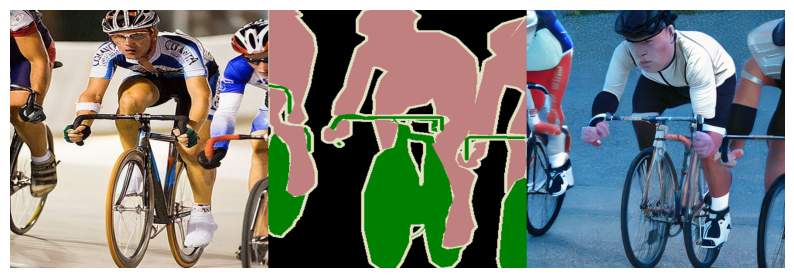

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


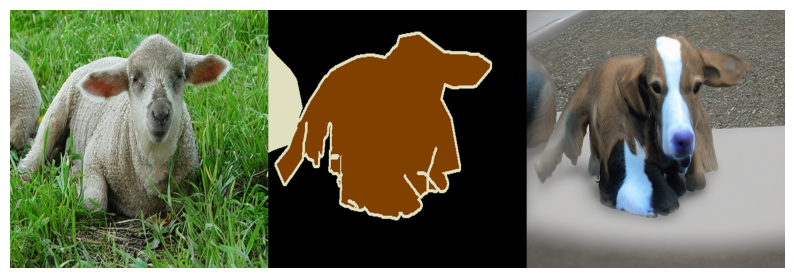

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


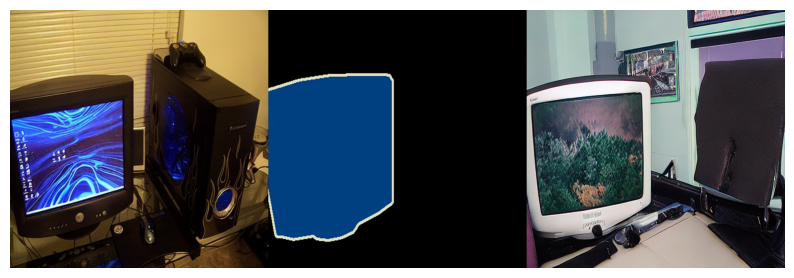

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


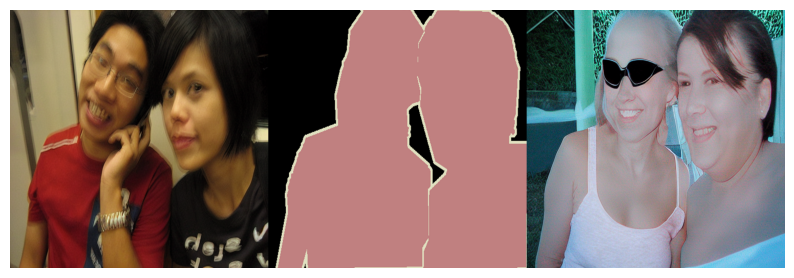

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


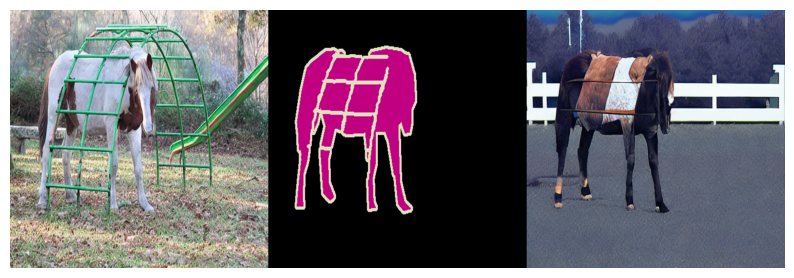

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


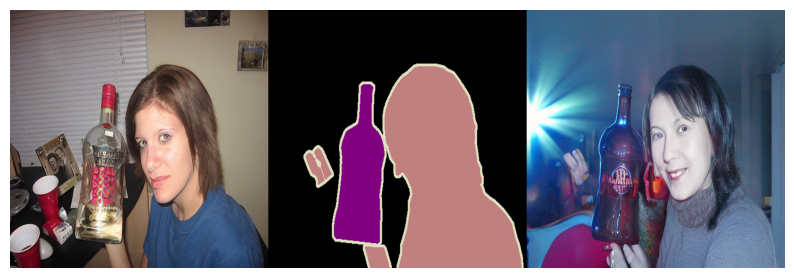

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


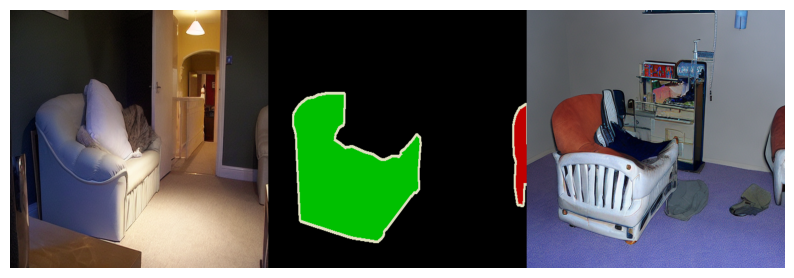

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


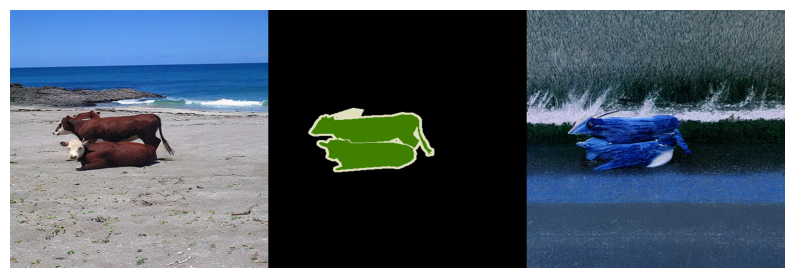

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


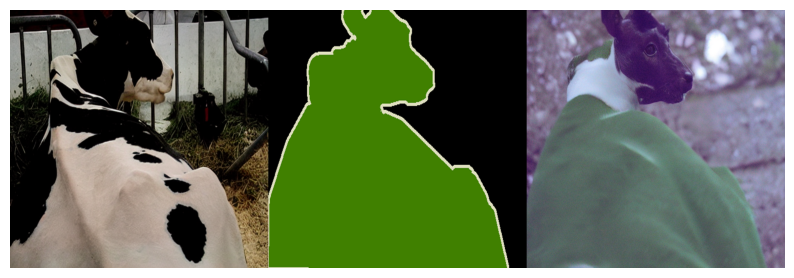

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


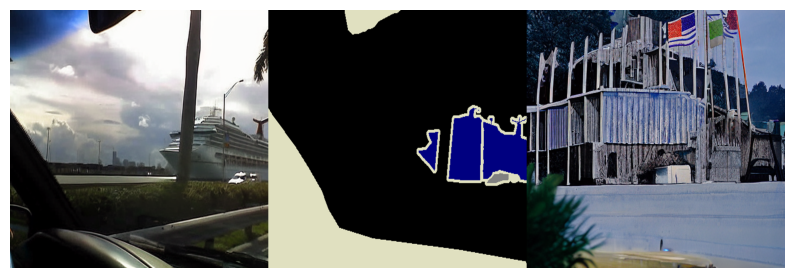

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


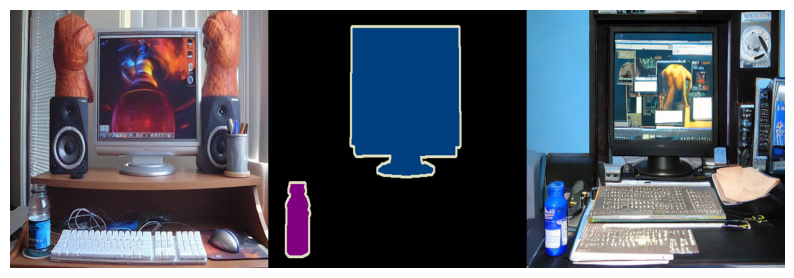

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


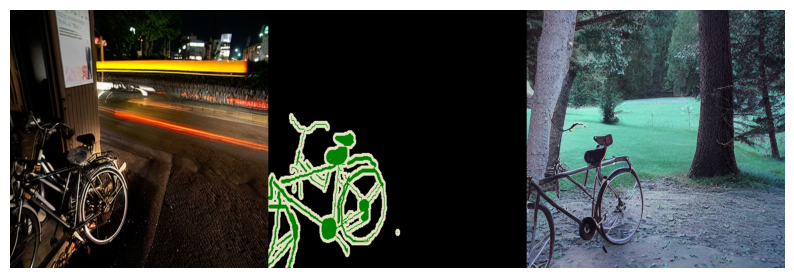

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


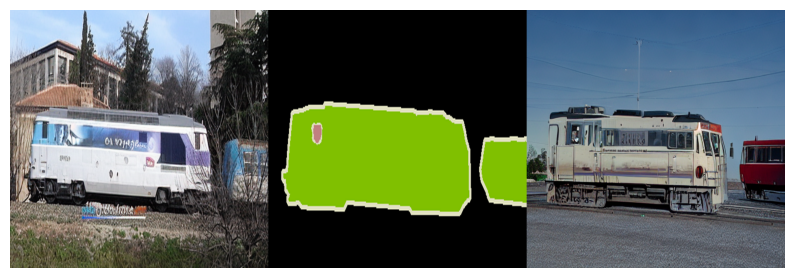

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


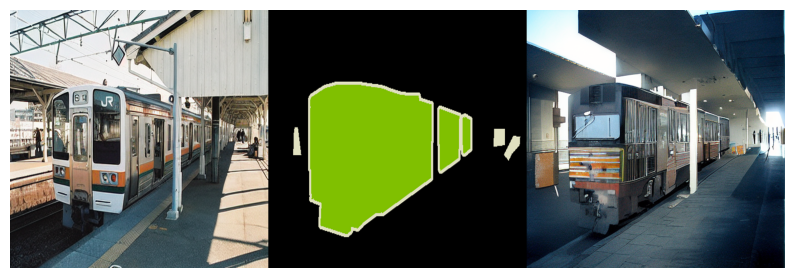

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


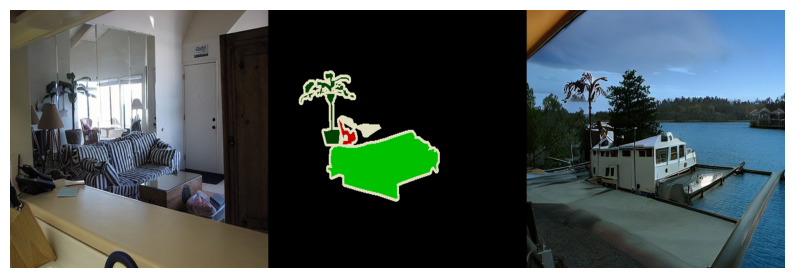

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


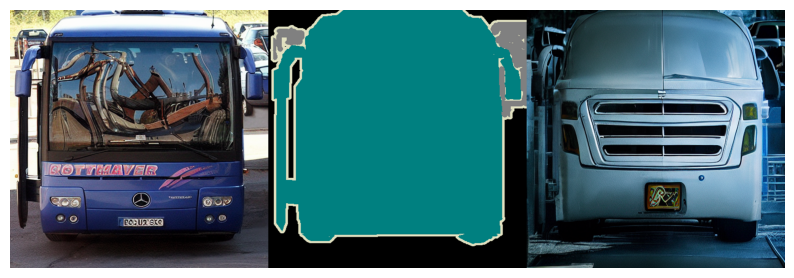

Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 50 timesteps


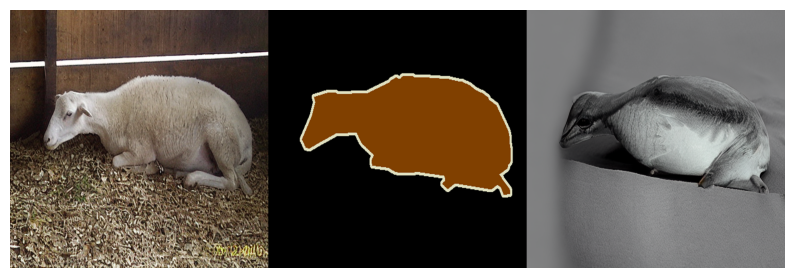

In [7]:
for i, data in enumerate(dataset):
    data['hint'] = torch.tensor(data['hint'], device=device).unsqueeze(0)
    data['jpg'] = torch.tensor(data['jpg'], device=device).unsqueeze(0)
    data['txt'] = [data['txt']]
    x, c = model.get_input(data, k=0)
    log = model.log_images(data)

    images = {}
    for k in ["reconstruction", "control", "samples_cfg_scale_9.00"]:
        img = torch.clamp(log[k], -1., 1.)
        img = img.cpu().numpy()[0]
        img = np.moveaxis(img, 0, -1)
        img = (img + 1) / 2
        img = (img * 255).astype(np.int64)
        img = img[...,::-1]
        images[k] = img
    plt.figure(figsize=(10,5))
    plt.imshow(np.concatenate(list(images.values()), 1))
    plt.axis('off')
    plt.show()
    if i == 20: break

In [5]:
import os
for file in os.listdir('temp_data'):
    os.rename(f'temp_data/{file}', f'temp_data/alt_{file}')